In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# to display all columns
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("measures_v2.csv")

In [3]:
print("Data-Size")
print("Number of Rows :",df.shape[0])
print("Number of Columns :",df.shape[1])

Data-Size
Number of Rows : 1330816
Number of Columns : 13


1. u_q: Voltage q-component measurement in dq-coordinates (in V)
2. coolant: Coolant temperature (in °C)
3. stator_winding: Stator winding temperature (in °C) measured with thermocouples
4. u_d: Voltage d-component measurement in dq-coordinates
5. stator_tooth: Stator tooth temperature (in °C) measured with thermocouples
6. motor_speed: Motor speed (in rpm)
7. i_d: Current d-component measurement in dq-coordinates
8. i_q: Current q-component measurement in dq-coordinates
9. pm: Permanent magnet temperature (in °C) measured with thermocouples and transmitted wirelessly via
10. stator_yoke: Stator yoke temperature (in °C) measured with thermocouples
11. ambient: Ambient temperature (in °C)
12. torque: Motor torque (in Nm)
13. profile_id: Measurement session id. Each distinct measurement session can be identified through this integer id.

The most interesting target features are rotor temperature ("pm"), stator temperatures ("stator_*") and torque. Especially rotor temperature and torque are not reliably and economically measurable in a commercial vehicle.

Being able to have strong estimators for the rotor temperature helps the automotive industry to manufacture motors with less material and enables control strategies to utilize the motor to its maximum capability.

A precise torque estimate leads to more accurate and adequate control of the motor, reducing power losses and eventually heat build-up.

## Exploratory Data Analysis

### Feature Engineering

#### Checking for variable names 

In [4]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

In [5]:
# we can see that all the variables follows the right naming format
# Hence there is not need of renaming the variables

#### Checking for datatypes

In [6]:
df.dtypes

u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
motor_speed       float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
profile_id          int64
dtype: object

In [7]:
# we can see that there is no mismatch of datatype in any of the variables
# Hence no need of type casting of varibales

#### Checking for duplicates records

In [8]:
df.duplicated().sum()

0

In [9]:
# we can see that there are no duplicates available in the data

#### Discrete Numerical Variables

In [10]:
discrete_features = [feature for feature in df.columns if df[feature].nunique()<25]
print('Discrete feature count {}'.format(len(discrete_features)))

Discrete feature count 0


#### Continuous Numerical Variables

In [11]:
continuous_features = [feature for feature in df.columns if feature not in discrete_features]
print("Continuous feature Count {}".format(len(continuous_features)))

# display of data with continuous features
df[continuous_features].head()

Continuous feature Count 13


,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [12]:
# we found that all the variables are Continuous Numerical Variables

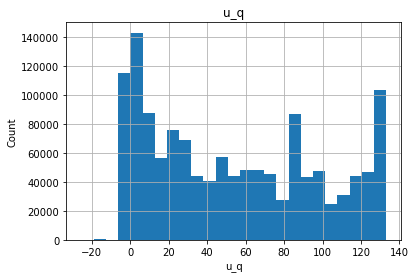

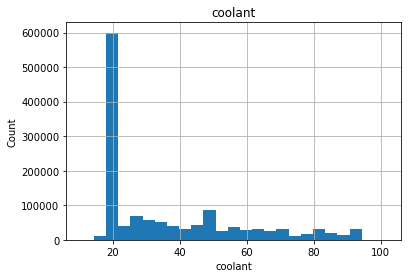

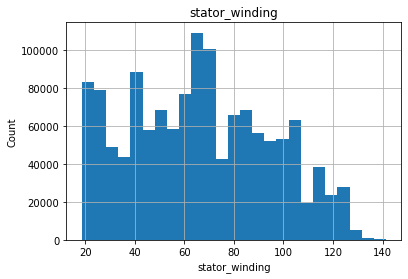

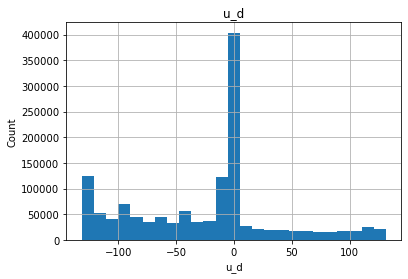

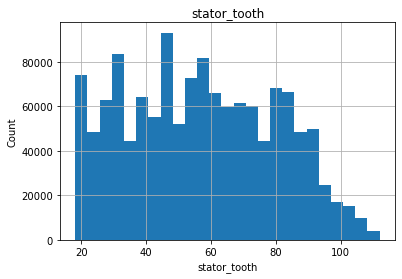

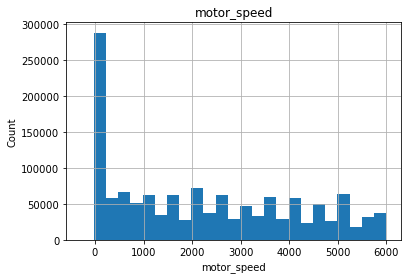

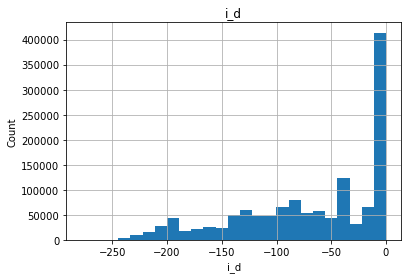

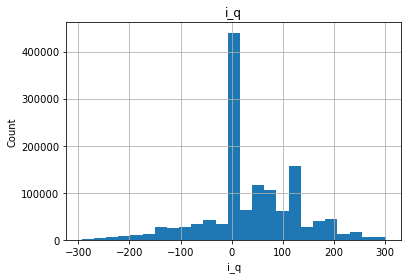

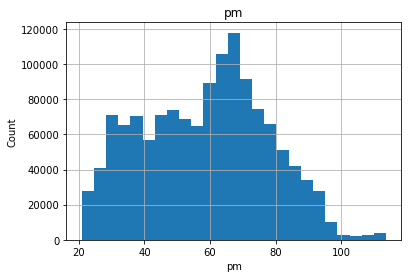

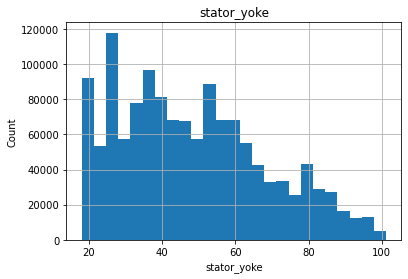

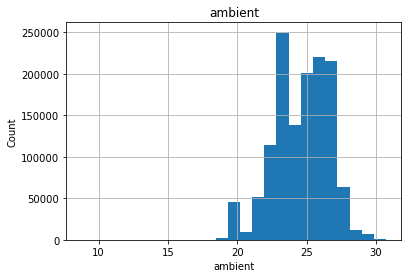

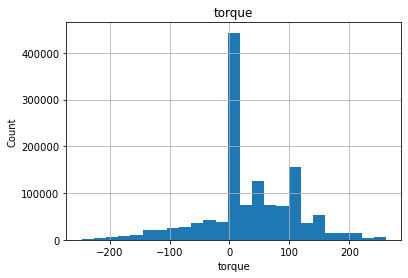

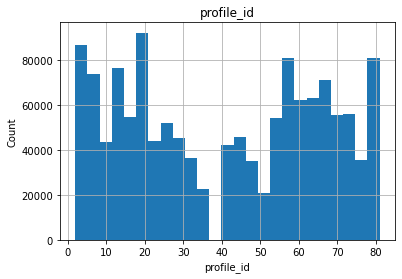

In [13]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


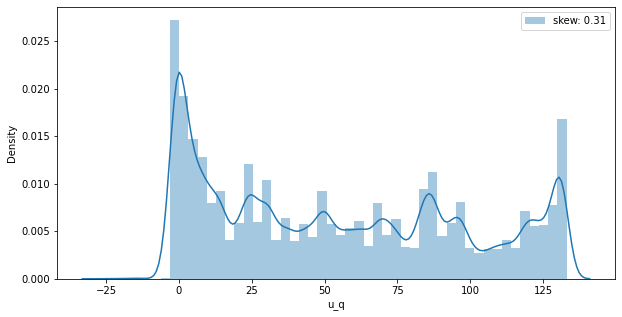

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


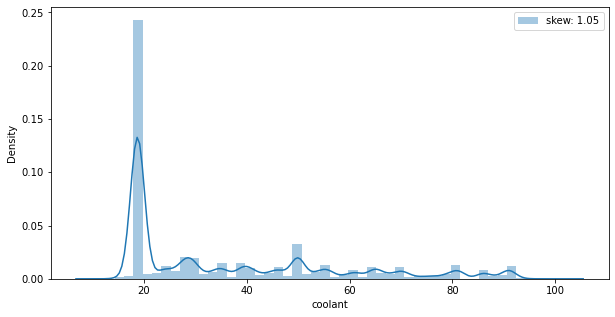

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


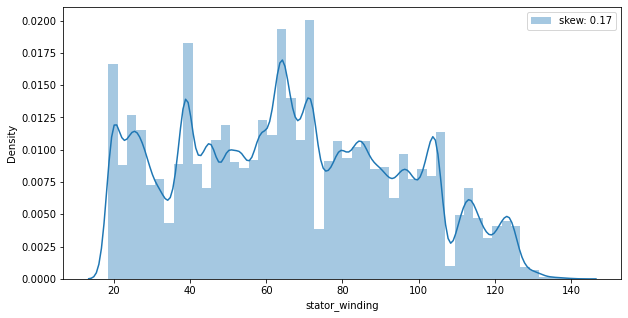

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


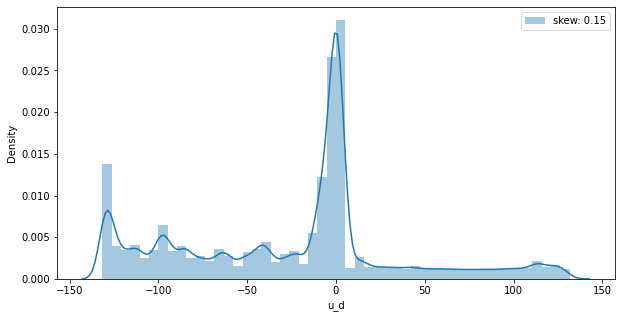

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


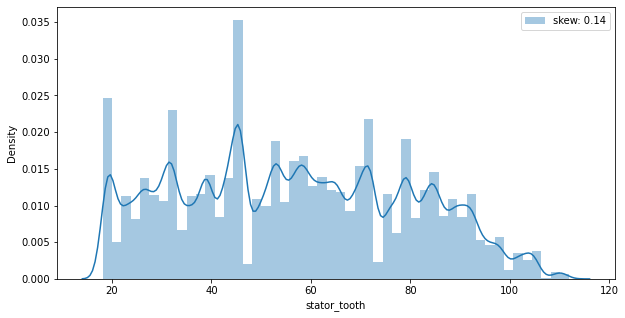

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


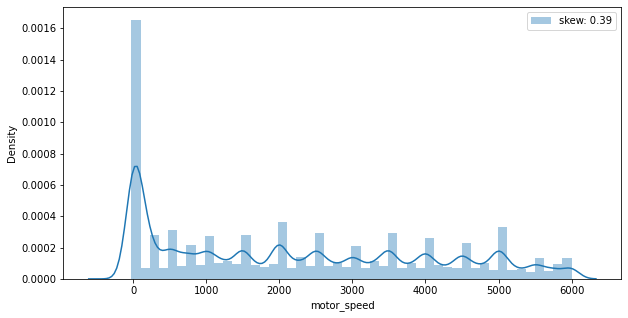

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


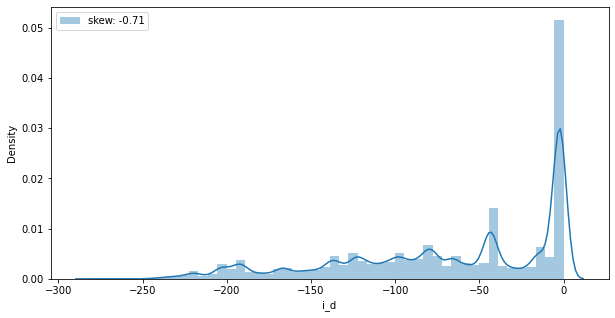

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


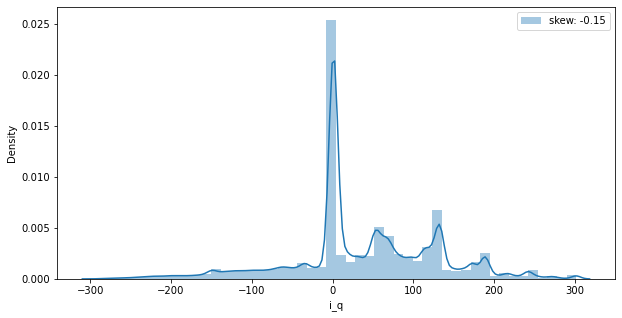

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


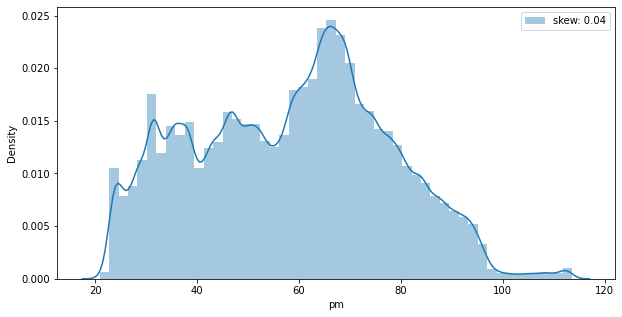

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


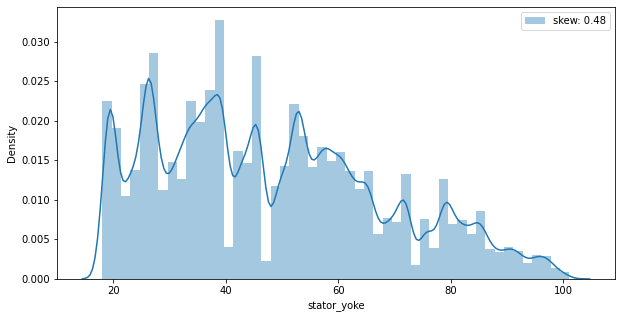

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


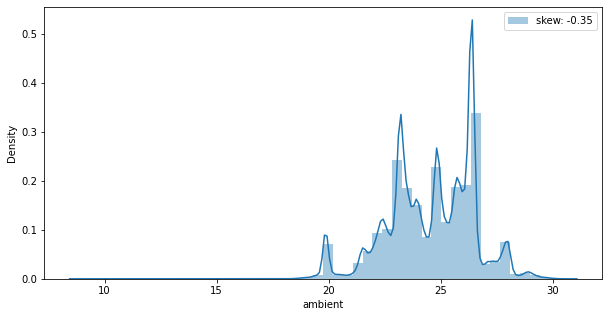

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


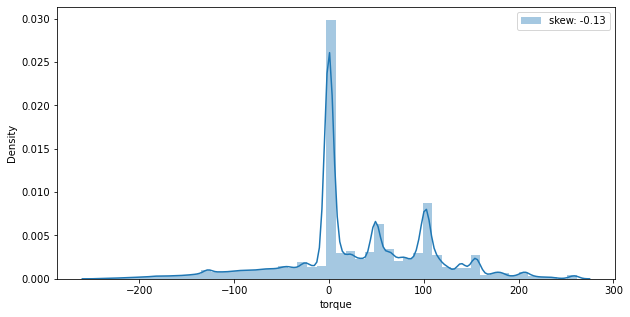

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


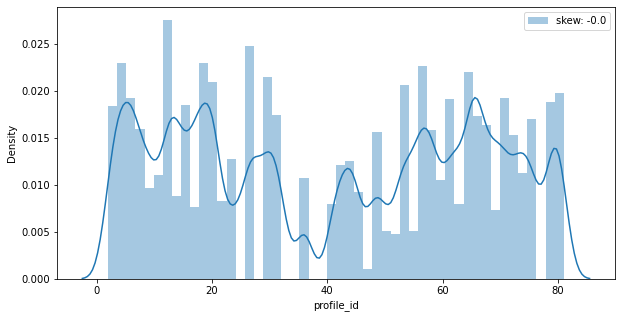

In [14]:
## Checking for distribution and skewness of data

import scipy.stats as stats

for col in df.columns:
    data=df.copy()
    plt.figure(figsize=(10,5))
    sns.distplot(data[col], label="skew: " + str(np.round(data[col].skew(),2)))
    plt.legend()
    plt.show()

In [15]:
# we can see that data is not following normal distribution fully and for some of the variables skewness is high

#### Checking for missing records

In [16]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

<AxesSubplot:>

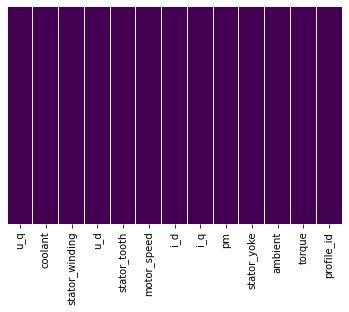

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [18]:
# we can see that there are no missings in the data

#### 5 Number Summary (Statistical Summary)

In [19]:
df.describe().round(3) # round off to 3 digits

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000
mean,54.279,36.230,66.343,-25.134,56.879,2202.081,-68.717,37.413,58.507,48.188,24.565,31.106,40.793
std,44.173,21.786,28.672,63.092,22.952,1859.663,64.933,92.182,19.001,19.991,1.930,77.136,25.045
min,-25.291,10.624,18.586,-131.530,18.134,-275.549,-278.004,-293.427,20.857,18.077,8.783,-246.467,2.000
25%,12.070,18.698,42.788,-78.691,38.416,317.111,-115.406,1.096,43.152,31.990,23.185,-0.137,17.000
50%,48.938,26.900,65.110,-7.430,56.036,1999.977,-51.094,15.774,60.266,45.626,24.797,10.860,43.000
75%,90.034,49.857,88.141,1.470,75.587,3760.639,-2.980,100.612,72.008,61.461,26.217,91.597,65.000
max,133.037,101.599,141.363,131.470,111.946,6000.015,0.052,301.708,113.607,101.148,30.714,261.006,81.000


#### Checking for outliers

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


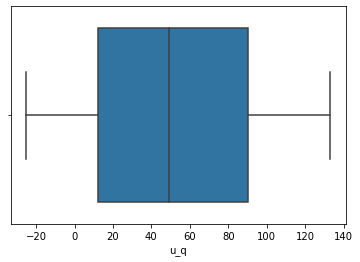

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


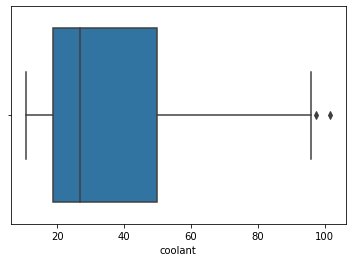

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


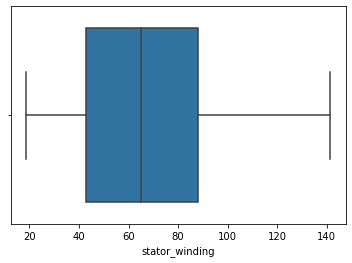

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


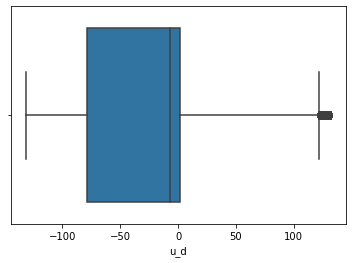

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


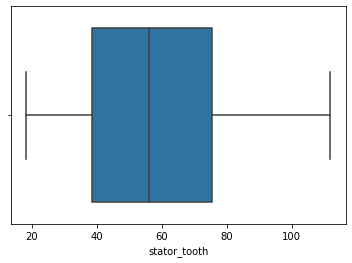

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


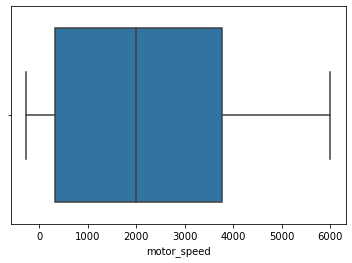

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


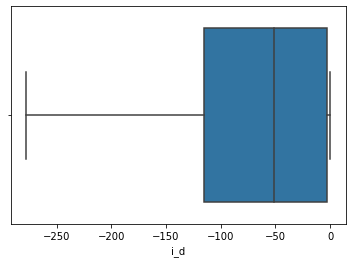

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


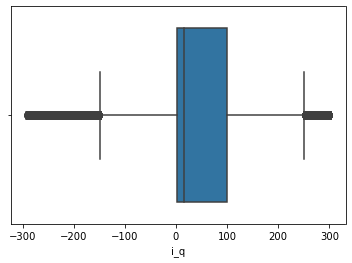

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


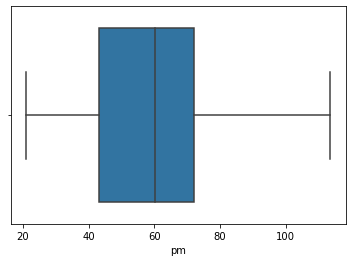

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


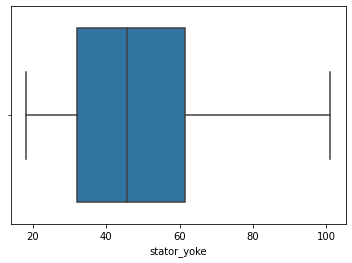

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


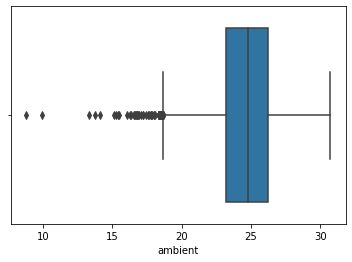

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


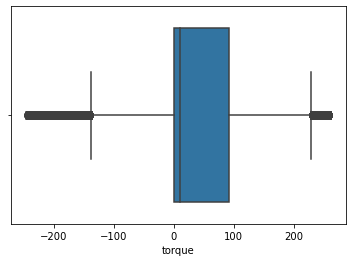

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


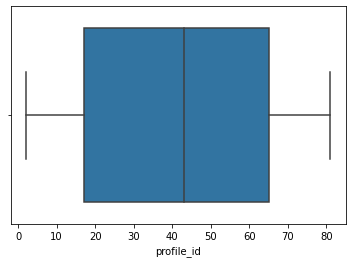

In [20]:
for col in df.columns:
    data=df.copy()
    sns.boxplot(data[col])
    plt.show()

In [21]:
# will drop the variable "profile_id" as it contains just an idetifier integers number(id's)
df.drop(["profile_id"], axis=1, inplace=True)

In [22]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197


#### Capping using IQR method

In [23]:
df_cap = df.copy()

In [24]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [25]:
target = df_cap.torque

In [26]:
features = df_cap[df_cap.columns.difference(["torque"])]

In [27]:
iqr_capping(df_cap, features, 1.5)

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


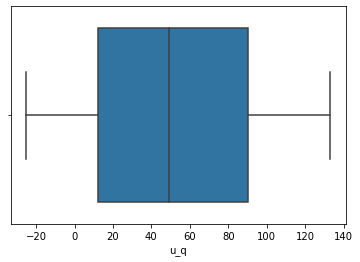

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


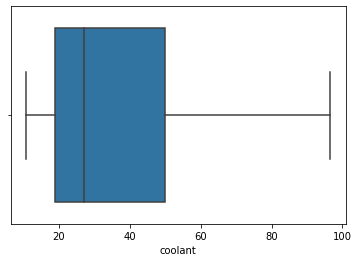

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


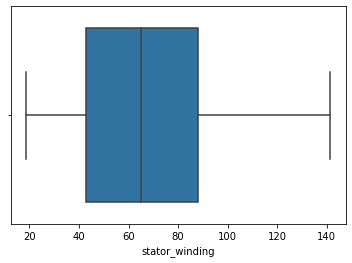

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


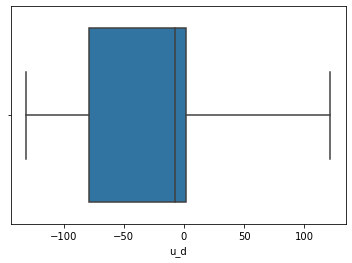

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


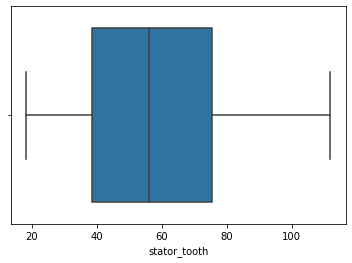

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


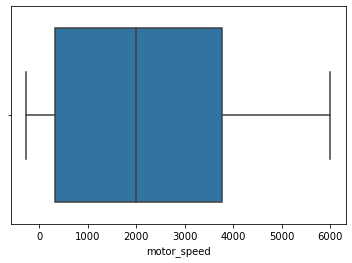

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


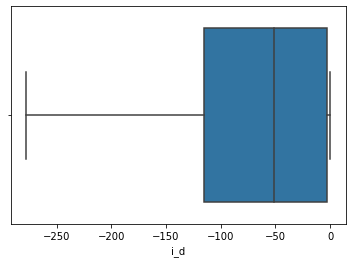

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


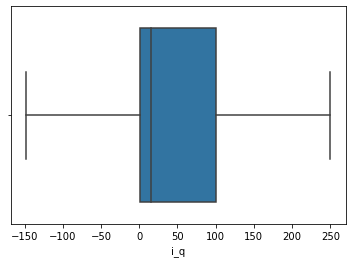

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


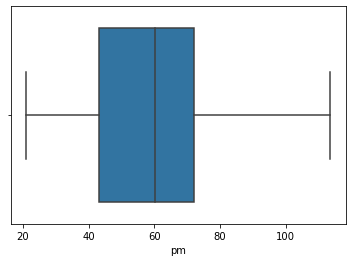

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


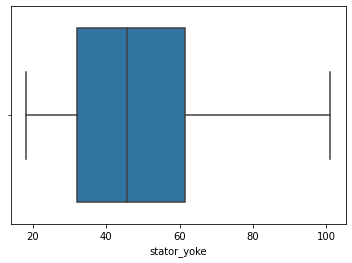

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


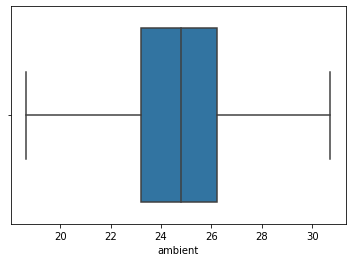

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


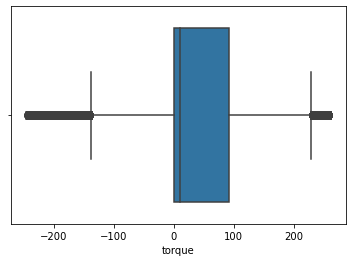

In [28]:
for col in df_cap.columns:
    data=df_cap.copy()
    sns.boxplot(data[col])
    plt.show()

In [29]:
df_cap.describe().round(3)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
count,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000
mean,54.279,36.230,66.343,-25.194,56.879,2202.081,-68.717,38.744,58.507,48.188,24.565,31.106
std,44.173,21.786,28.672,62.949,22.952,1859.663,64.933,87.195,19.001,19.991,1.929,77.136
min,-25.291,10.624,18.586,-131.530,18.134,-275.549,-278.004,-148.179,20.857,18.077,18.636,-246.467
25%,12.070,18.698,42.788,-78.691,38.416,317.111,-115.406,1.096,43.152,31.990,23.185,-0.137
50%,48.938,26.900,65.110,-7.430,56.036,1999.977,-51.094,15.774,60.266,45.626,24.797,10.860
75%,90.034,49.857,88.141,1.470,75.587,3760.639,-2.980,100.612,72.008,61.461,26.217,91.597
max,133.037,96.597,141.363,121.712,111.946,6000.015,0.052,249.887,113.607,101.148,30.714,261.006


In [30]:
df_cap.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197


In [31]:
# Checking if the Y variabble is normal

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='torque', ylabel='Density'>

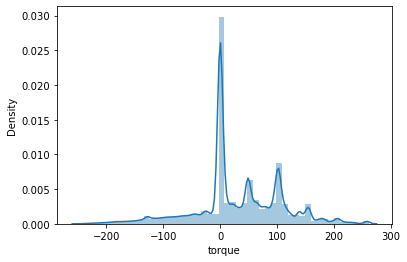

In [32]:
sns.distplot(target)

In [33]:
print ("skewness:",target.skew())
print ( "kurtosis:",target.kurtosis())

skewness: -0.12714097065658322
kurtosis: 0.6695155849827308


### Feature Scaling

In [34]:
# standardizing the data
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()

In [36]:
std_model = sc.fit(features)

In [37]:
std_model.transform(features)

array([[-2.4433861 , -0.79981228,  1.05833717, ..., -1.49424355,
         0.39281962, -1.23897895],
       [-2.44339598, -0.79919725,  1.05827845, ..., -1.49432321,
         0.393521  , -1.23615044],
       [-2.44340389, -0.79872912,  1.05828898, ..., -1.49375533,
         0.39246382, -1.2387567 ],
       ...,
       [-0.30475007, -0.25285262,  1.0274795 , ..., -0.47706685,
         0.41112574, -1.27700269],
       [-0.29221486, -0.25285243,  1.02745286, ..., -0.47682858,
         0.41046284, -1.28013097],
       [-0.27868789, -0.2528523 ,  1.02745604, ..., -0.47659428,
         0.4111637 , -1.27632004]])

In [38]:
data_scaled = pd.DataFrame(std_model.transform(features), columns = features.columns)

In [39]:
data_scaled

,ambient,coolant,i_d,i_q,motor_speed,pm,stator_tooth,stator_winding,stator_yoke,u_d,u_q
0,-2.443386,-0.799812,1.058337,-0.405855,-1.184128,-1.786837,-1.681117,-1.648158,-1.494244,0.392820,-1.238979
1,-2.443396,-0.799197,1.058278,-0.405867,-1.184129,-1.787686,-1.681047,-1.647959,-1.494323,0.393521,-1.236150
2,-2.443404,-0.798729,1.058289,-0.405854,-1.184128,-1.787338,-1.681078,-1.648064,-1.493755,0.392464,-1.238757
3,-2.443409,-0.798417,1.058270,-0.405836,-1.184126,-1.786847,-1.681146,-1.648285,-1.493529,0.393356,-1.236180
4,-2.443413,-0.797432,1.057279,-0.405455,-1.184127,-1.786248,-1.681195,-1.648303,-1.493738,0.393101,-1.239442
...,...,...,...,...,...,...,...,...,...,...,...
1330811,-0.298612,-0.252853,1.027466,-0.393952,-1.184129,0.191617,-0.651102,-0.734801,-0.476927,0.410918,-1.277497
1330812,-0.308136,-0.252853,1.027461,-0.393952,-1.184128,0.191347,-0.653952,-0.736038,-0.476796,0.410713,-1.279909
1330813,-0.304750,-0.252853,1.027480,-0.393939,-1.184128,0.191122,-0.656745,-0.736995,-0.477067,0.411126,-1.277003
1330814,-0.292215,-0.252852,1.027453,-0.393972,-1.184126,0.190861,-0.658601,-0.737626,-0.476829,0.410463,-1.280131


In [40]:
# describing the data
data_scaled.describe().round(3)

,ambient,coolant,i_d,i_q,motor_speed,pm,stator_tooth,stator_winding,stator_yoke,u_d,u_q
count,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000
mean,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-8.179,-1.175,-3.223,-3.589,-1.332,-1.981,-1.688,-1.666,-1.506,-1.686,-1.801
25%,-0.715,-0.805,-0.719,-0.394,-1.014,-0.808,-0.804,-0.822,-0.810,-0.849,-0.956
50%,0.120,-0.428,0.271,-0.235,-0.109,0.093,-0.037,-0.043,-0.128,0.281,-0.121
75%,0.856,0.626,1.012,0.686,0.838,0.711,0.815,0.760,0.664,0.422,0.809
max,3.187,3.000,1.059,2.867,2.042,2.900,2.399,2.616,2.649,2.482,1.783


### Feature Reduction

#### Correlation

In [41]:
data_scaled.corr()

,ambient,coolant,i_d,i_q,motor_speed,pm,stator_tooth,stator_winding,stator_yoke,u_d,u_q
ambient,1.000000,0.525963,0.016397,-0.314044,0.118232,0.513728,0.443470,0.333208,0.520382,0.203647,0.150264
coolant,0.525963,1.000000,0.074865,-0.256389,0.011872,0.467117,0.674974,0.504835,0.860750,0.195517,0.051721
i_d,0.016397,0.074865,1.000000,-0.231344,-0.700609,-0.427736,-0.487062,-0.624370,-0.278005,0.448331,-0.100357
i_q,-0.314044,-0.256389,-0.231344,1.000000,-0.068881,-0.142416,-0.042294,0.065617,-0.131466,-0.723069,-0.124589
motor_speed,0.118232,0.011872,-0.700609,-0.068881,1.000000,0.458947,0.398431,0.432034,0.255790,-0.288472,0.683556
pm,0.513728,0.467117,-0.427736,-0.142416,0.458947,1.000000,0.832084,0.795893,0.756684,-0.172031,0.122365
stator_tooth,0.443470,0.674974,-0.487062,-0.042294,0.398431,0.832084,1.000000,0.970135,0.953115,-0.142749,0.104373
stator_winding,0.333208,0.504835,-0.624370,0.065617,0.432034,0.795893,0.970135,1.000000,0.860268,-0.234950,0.050610
stator_yoke,0.520382,0.860750,-0.278005,-0.131466,0.255790,0.756684,0.953115,0.860268,1.000000,-0.008098,0.090992
u_d,0.203647,0.195517,0.448331,-0.723069,-0.288472,-0.172031,-0.142749,-0.234950,-0.008098,1.000000,0.004702


<AxesSubplot:>

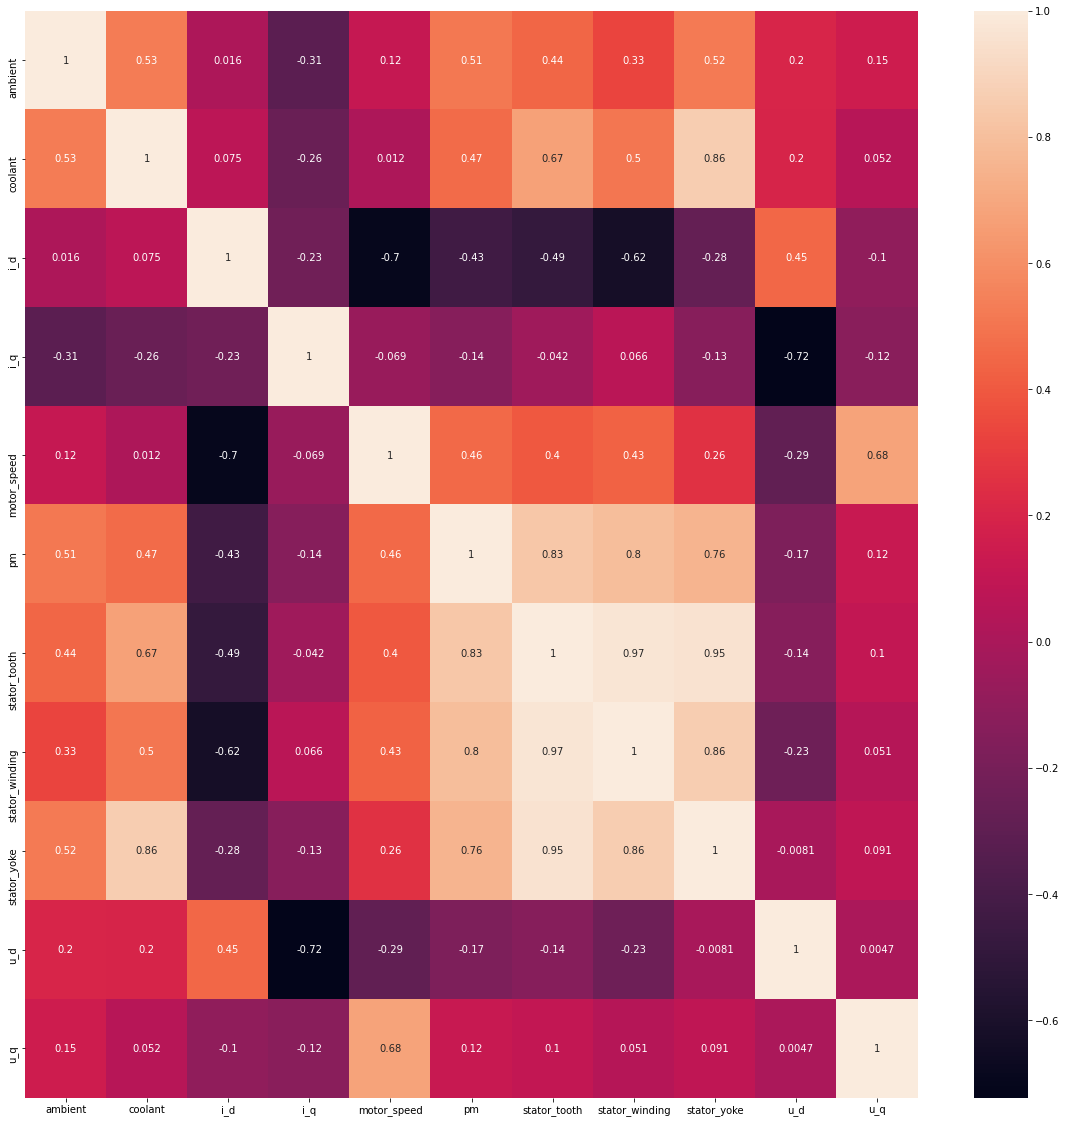

In [42]:
import seaborn as sns
corr=data_scaled.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(features[top_features].corr(),annot=True)


In [43]:
#### Remove The correlated

In [44]:
threshold=0.9

In [45]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [46]:
correlation(data_scaled,threshold)

{'stator_winding', 'stator_yoke'}

In [47]:
data_scaled.columns

Index(['ambient', 'coolant', 'i_d', 'i_q', 'motor_speed', 'pm', 'stator_tooth',
       'stator_winding', 'stator_yoke', 'u_d', 'u_q'],
      dtype='object')

In [48]:
imp_vars = ['ambient', 'coolant', 'i_d', 'i_q', 'motor_speed', 'pm', 'stator_tooth', 'u_d', 'u_q']

In [49]:
features_selected = data_scaled[imp_vars]

In [50]:
features_selected

,ambient,coolant,i_d,i_q,motor_speed,pm,stator_tooth,u_d,u_q
0,-2.443386,-0.799812,1.058337,-0.405855,-1.184128,-1.786837,-1.681117,0.392820,-1.238979
1,-2.443396,-0.799197,1.058278,-0.405867,-1.184129,-1.787686,-1.681047,0.393521,-1.236150
2,-2.443404,-0.798729,1.058289,-0.405854,-1.184128,-1.787338,-1.681078,0.392464,-1.238757
3,-2.443409,-0.798417,1.058270,-0.405836,-1.184126,-1.786847,-1.681146,0.393356,-1.236180
4,-2.443413,-0.797432,1.057279,-0.405455,-1.184127,-1.786248,-1.681195,0.393101,-1.239442
...,...,...,...,...,...,...,...,...,...
1330811,-0.298612,-0.252853,1.027466,-0.393952,-1.184129,0.191617,-0.651102,0.410918,-1.277497
1330812,-0.308136,-0.252853,1.027461,-0.393952,-1.184128,0.191347,-0.653952,0.410713,-1.279909
1330813,-0.304750,-0.252853,1.027480,-0.393939,-1.184128,0.191122,-0.656745,0.411126,-1.277003
1330814,-0.292215,-0.252852,1.027453,-0.393972,-1.184126,0.190861,-0.658601,0.410463,-1.280131


#### PCA

In [51]:
# using PCA for reducing the variables
from sklearn.decomposition import PCA  

In [52]:
pca_model = PCA(n_components=9)

In [53]:
pca_model = pca_model.fit(features_selected)

In [54]:
pca_model.explained_variance_  # Eigen values

array([3.25353546, 2.35579215, 1.45172967, 0.76390546, 0.52111932,
       0.32254021, 0.22311641, 0.07451364, 0.03375444])

In [55]:
pca_model.explained_variance_ratio_

array([0.36150367, 0.26175449, 0.16130317, 0.08487832, 0.0579021 ,
       0.03583777, 0.02479069, 0.00827929, 0.00375049])

In [56]:
np.cumsum(pca_model.explained_variance_ratio_)

array([0.36150367, 0.62325816, 0.78456133, 0.86943965, 0.92734175,
       0.96317953, 0.98797022, 0.99624951, 1.        ])

In [57]:
# based on the criteria we will choose number of components = 3

In [58]:
pca_model = PCA(n_components=3)

pca_model = pca_model.fit(features_selected)

In [59]:
pca_model.explained_variance_

array([3.25353546, 2.35579215, 1.45172967])

In [60]:
pca_model.transform(features_selected)

array([[-3.80273835,  0.04222328, -0.03572346],
       [-3.80237136,  0.04184336, -0.03768765],
       [-3.80252434,  0.04208786, -0.03556084],
       ...,
       [-1.48709704, -0.99304063,  0.91596542],
       [-1.48476843, -0.99699653,  0.91856024],
       [-1.4803951 , -1.00164705,  0.91664422]])

In [61]:
PCs = pd.DataFrame(pca_model.transform(features_selected), columns = ['PC1','PC2','PC3'])

In [62]:
#Dimesnion Reduction
PCs

,PC1,PC2,PC3
0,-3.802738,0.042223,-0.035723
1,-3.802371,0.041843,-0.037688
2,-3.802524,0.042088,-0.035561
3,-3.801756,0.041648,-0.037287
4,-3.801553,0.041804,-0.034655
...,...,...,...
1330811,-1.482210,-0.995303,0.918386
1330812,-1.487250,-0.991982,0.918451
1330813,-1.487097,-0.993041,0.915965
1330814,-1.484768,-0.996997,0.918560


In [63]:
#Variable reduction

Loadings =  pd.DataFrame((pca_model.components_.T * np.sqrt(pca_model.explained_variance_)).T,columns=features_selected.columns).T

Loadings.column= ['PC1','PC2','PC3']

<ipython-input-63-831d04485b9e>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Loadings.column= ['PC1','PC2','PC3']


In [64]:
Loadings

,0,1,2
ambient,0.569955,-0.516890,0.092908
coolant,0.574310,-0.543968,0.326933
i_d,-0.591631,-0.608446,0.028843
i_q,-0.139929,0.747147,0.429094
motor_speed,0.697353,0.405629,-0.558468
pm,0.875976,-0.062484,0.209261
stator_tooth,0.890858,-0.069887,0.319415
u_d,-0.183237,-0.826463,-0.306876
u_q,0.385237,0.088963,-0.774199


In [65]:
Loadings.to_csv('loadings.csv')

In [66]:
#PCA can be used for any type of business problem (regressin, classificaiton, segmentation)
selected_vars = ["stator_tooth",
                 "pm",
                 "motor_speed",
                 "coolant",
                 "ambient",
                 "i_d",
                 "i_q",
                 "u_d",
                 "u_q"]

In [67]:
final_data = data_scaled[selected_vars]

In [68]:
final_data1 = pd.concat([final_data, np.round(target,4)], axis=1)

In [69]:
final_data1.head()

,stator_tooth,pm,motor_speed,coolant,ambient,i_d,i_q,u_d,u_q,torque
0,-1.681117,-1.786837,-1.184128,-0.799812,-2.443386,1.058337,-0.405855,0.392820,-1.238979,0.1871
1,-1.681047,-1.787686,-1.184129,-0.799197,-2.443396,1.058278,-0.405867,0.393521,-1.236150,0.2454
2,-1.681078,-1.787338,-1.184128,-0.798729,-2.443404,1.058289,-0.405854,0.392464,-1.238757,0.1766
3,-1.681146,-1.786847,-1.184126,-0.798417,-2.443409,1.058270,-0.405836,0.393356,-1.236180,0.2383
4,-1.681195,-1.786248,-1.184127,-0.797432,-2.443413,1.057279,-0.405455,0.393101,-1.239442,0.2082


#### Data Preparation Level 4 : split data into train and test


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
train, test = train_test_split(final_data1, test_size=0.3, random_state=123)

In [72]:
train.shape

(931571, 10)

In [73]:
test.shape

(399245, 10)

### Model Building

In [74]:
y = 'torque'

In [75]:
y

'torque'

In [76]:
s = str()

In [77]:
for i in final_data1.columns.tolist():
    s = s + '+' + i

In [78]:
equation=s[1:]

In [79]:
equation

'stator_tooth+pm+motor_speed+coolant+ambient+i_d+i_q+u_d+u_q+torque'

In [80]:
equation= y +"~" +equation

In [81]:
equation

'torque~stator_tooth+pm+motor_speed+coolant+ambient+i_d+i_q+u_d+u_q+torque'

### Modeling

In [82]:
import statsmodels.formula.api as smf

In [83]:
model = smf.ols('torque~stator_tooth+pm+motor_speed+coolant+ambient+i_d+i_q+u_d+u_q', data=train).fit()

In [84]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 torque   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.990e+07
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:00:25   Log-Likelihood:            -2.7296e+06
No. Observations:              931571   AIC:                         5.459e+06
Df Residuals:                  931561   BIC:                         5.459e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       31.1063      0.005   6624.342   

In [85]:
# predicting values for train data

pred_train  = model.predict(train)
actual_train = train.torque

In [86]:
# predicting values for train data

pred_test  = model.predict(test)
actual_test = test.torque

In [87]:
from sklearn import metrics

In [90]:
#Metrics for both training and testing data 

#Mean Absolute Error
print("\nMAE values for training and testing data :")
MAE_train = metrics.mean_absolute_error(actual_train,pred_train)
print(MAE_train)
MAE_test =metrics.mean_absolute_error(actual_test,pred_test)
print(MAE_test)

#r2 value
print("\nr2 values for training and testing data :")
MSE_train = metrics.r2_score(actual_train,pred_train)
print(MSE_train)
MSE_test =metrics.r2_score(actual_test,pred_test)
print(MSE_test)

#Mean Squared error
print("\nMSE values for training and testing data :")
MSE_train = metrics.mean_squared_error(actual_train,pred_train)
print(MSE_train)
MSE_test =metrics.mean_squared_error(actual_test,pred_test)
print(MSE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_train = np.sqrt(metrics.mean_squared_error(actual_train,pred_train))
print(RMSE_train)
RMSE_test =np.sqrt(metrics.mean_squared_error(actual_test,pred_test))
print(RMSE_test)


MAE values for training and testing data :
3.0612058497157553
3.055326489892876

r2 values for training and testing data :
0.9965498038596556
0.9965173241832219

MSE values for training and testing data :
20.540951866714103
20.691922808593375

RMSE values for training and testing data :
4.532212689924658
4.548837522773635


## Machine Learning 

In [91]:
x = final_data1[final_data1.columns.difference(['torque'])]
y = final_data1.torque

In [94]:
#Considering Significant Variables for Machine Learning algorithms
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=123)

In [95]:
train_x.shape

(931571, 9)

In [96]:
train_y.shape

(931571,)

In [97]:
test_x.shape

(399245, 9)

In [98]:
test_y.shape

(399245,)

In [99]:
# Importing Required Packages
from sklearn.linear_model import Lasso, Ridge

### Lasso Regression 

In [100]:
Lasso_Reg = Lasso(alpha=0.0001,normalize=True)
Lasso_Reg.fit(train_x,train_y)

Lasso(alpha=0.0001, normalize=True)

In [102]:
# finding all metric results

def model_metric_results(model,train_x, train_y, test_x, test_y):
    print('MAPE')
    print('train_MAE :', metrics.mean_absolute_error(actual_train,pred_train))
    print('test_MAE :', metrics.mean_absolute_error(actual_test,pred_test))
    print('------------------------------------------------------------------------------------------------------------')
    print('r2')
    print('train_r2 :', metrics.r2_score(actual_train,pred_train))
    print('test_r2 :', metrics.r2_score(actual_test,pred_test))
    print('------------------------------------------------------------------------------------------------------------')
    print('MSE')
    print('train_RMSE :', metrics.mean_squared_error(actual_train,pred_train))
    print('test_RMSE :', metrics.mean_squared_error(actual_test,pred_test))
    print('------------------------------------------------------------------------------------------------------------')
    print('RMSE')
    print('train_RMSE :', np.sqrt(metrics.mean_squared_error(actual_train,pred_train)))
    print('test_RMSE :', np.sqrt(metrics.mean_squared_error(actual_test,pred_test)))

In [103]:
model_metric_results(Lasso_Reg, train_x, train_y, test_x, test_y)

MAPE
train_MAE : 3.0612058497157553
test_MAE : 3.055326489892876
------------------------------------------------------------------------------------------------------------
r2
train_r2 : 0.9965498038596556
test_r2 : 0.9965173241832219
------------------------------------------------------------------------------------------------------------
MSE
train_RMSE : 20.540951866714103
test_RMSE : 20.691922808593375
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 4.532212689924658
test_RMSE : 4.548837522773635


### Ridge Regression

In [104]:
Ridge_Reg = Ridge(alpha=0.0001,normalize=True)
Ridge_Reg.fit(train_x,train_y)

Ridge(alpha=0.0001, normalize=True)

In [105]:
model_metric_results(Ridge_Reg, train_x, train_y, test_x, test_y)

MAPE
train_MAE : 3.0612058497157553
test_MAE : 3.055326489892876
------------------------------------------------------------------------------------------------------------
r2
train_r2 : 0.9965498038596556
test_r2 : 0.9965173241832219
------------------------------------------------------------------------------------------------------------
MSE
train_RMSE : 20.540951866714103
test_RMSE : 20.691922808593375
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 4.532212689924658
test_RMSE : 4.548837522773635


### RandomForest Regressor

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [109]:
# tuning parameters

grid = {'n_estimators': [50, 60, 70, 80, 90, 100], 'max_features': [2,3,4], 'max_depth': [2,3,4,5,6]}

In [110]:
rf_model = GridSearchCV(RandomForestRegressor(), grid, cv=5, scoring='r2', verbose=True, n_jobs=-1)

In [111]:
rf_model = rf_model.fit(train_x, train_y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


KeyboardInterrupt: 

In [180]:
rf_model.best_params_

{'max_depth': 2, 'max_features': 2, 'n_estimators': 100}

In [181]:
rf_model.best_estimator_

RandomForestRegressor(max_depth=2, max_features=2)

In [243]:
rf_model_final = RandomForestRegressor(n_estimators=100, max_depth=2, max_features=2)

In [244]:
rf_model_final = rf_model_final.fit(train_x, train_y)

In [245]:
model_metric_results(rf_model_final, train_x, train_y, test_x, test_y)

MAPE
train_MAPE : 0.11867876594562798
test_MAPE : 0.11767445897031088
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 1.5325297945158662
test_RMSE : 1.5253041579098388
------------------------------------------------------------------------------------------------------------
RMSPE
train_RMSPE : 0.16466896382775395
test_RMSPE : 0.16280945292142956


### XGBoost Regressor

In [112]:
# !pip install xgboost ------> we have to install xgboost if not already install on machine

from xgboost import XGBRegressor

In [113]:
# tuning parameters

s_grid = {'learning_rate':[0.01,0.05,0.1], 'n_estimators':[60,70,80,100,200,300], 'max_depth':[2,3,4,5,6]}

In [ ]:
xgb_model = GridSearchCV(XGBRegressor(), s_grid, cv=5, scoring='r2', n_jobs=-1, verbose=True)

In [ ]:
xgb_model = xgb_model.fit(train_x, train_y)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


In [210]:
xgb_model.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}

In [211]:
xgb_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [212]:
xgb_model_final = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=2)

In [213]:
xgb_model_final = xgb_model_final.fit(train_x, train_y)

In [252]:
model_metric_results(xgb_model_final, train_x, train_y, test_x, test_y)

MAPE
train_MAPE : 0.11662633421118594
test_MAPE : 0.11607136049323309
------------------------------------------------------------------------------------------------------------
RMSE
train_RMSE : 1.5248545514356524
test_RMSE : 1.5258092147786682
------------------------------------------------------------------------------------------------------------
RMSPE
train_RMSPE : 0.16203070874646924
test_RMSPE : 0.1611042247245405
